In [ ]:
import matplotlib.pyplot as plt
import string
import pandas as pd
import os
import seaborn as sb
from collections import Counter

In [2]:
# to compare data before and after cleaning
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re

In [3]:
os.getcwd()
%matplotlib inline

In [4]:

Dataset = pd.read_csv("spam.csv",encoding='latin1')

In [5]:
Dataset.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3509,ham,I just saw ron burgundy captaining a party boa...,NaN,NaN,NaN
4395,ham,Dear :-/ why you mood off. I cant drive so i b...,NaN,NaN,NaN
5164,spam,Congrats 2 mobile 3G Videophones R yours. call...,NaN,NaN,NaN
4730,ham,K:)eng rocking in ashes:),NaN,NaN,NaN
1679,ham,"Today is \song dedicated day..\"" Which song wi...",NaN,NaN,NaN


In [6]:
Dataset.rename(columns={"v1":"label", "v2":"text"}, inplace=True)
Dataset = Dataset[["label", "text"]]
data_before = Dataset.copy()

In [7]:
#Preprocessing data
test=data_before.head(5)
BeforeDS=data_before.head(5)
Dataset['text']=Dataset['text'].apply(word_tokenize)
Dataset['text']=Dataset['text'].apply(lambda x: [re.sub(r'[^a-zA-Z0-9\s$]', '', word) for word in x])
stop_words = set(stopwords.words('english'))
Dataset['text'] = Dataset['text'].apply(lambda x: [word for word in x if word not in stop_words and word not in string.punctuation])
ps = PorterStemmer()
Dataset['text'] = Dataset['text'].apply(lambda x: [ps.stem(word) for word in x]) 
Dataset['text'] = Dataset['text'].apply(lambda x: ' '.join(x))

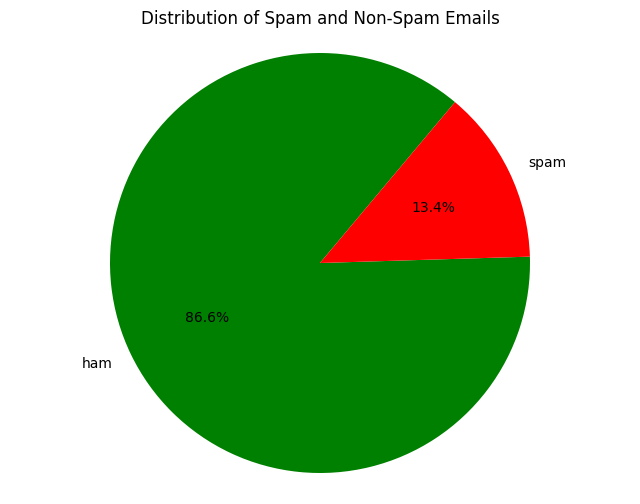

In [16]:
# setting up data
labels = ['ham', 'spam']
sizes = [
    Dataset[Dataset['label'] == 'ham'].shape[0],
    Dataset[Dataset['label'] == 'spam'].shape[0]
]

myColors = ["green","red"]

# Plotting

plt.figure(figsize=(8, 6))
plt.pie(
        sizes,
        labels=labels,
        startangle=50,
        autopct='%1.1f%%',
        colors=myColors)

plt.title('Distribution of Spam and Non-Spam Emails')
plt.axis('equal')
plt.show()

label
ham     4825
spam     747
Name: count, dtype: int64


C:\Users\Mohannad\AppData\Local\Temp\ipykernel_30640\3170845653.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x=label_number.index, y=label_number.values, palette="viridis")


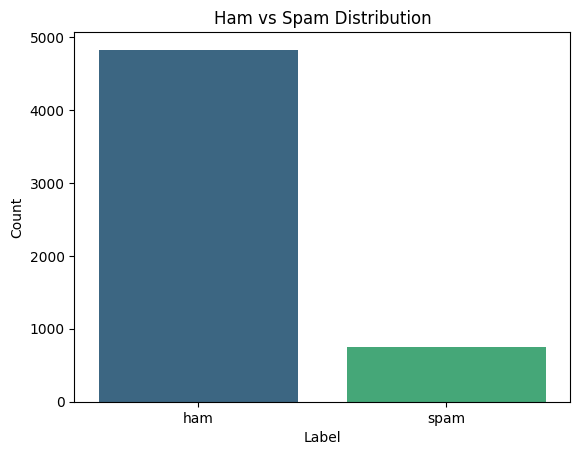

In [9]:

#1. Label Distribution
label_number = Dataset["label"].value_counts()
print(label_number)

sb.barplot(x=label_number.index, y=label_number.values, palette="viridis")
plt.title("Ham vs Spam Distribution")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()




Average message length:
label
ham      71.023627
spam    138.866131
Name: text_length, dtype: float64


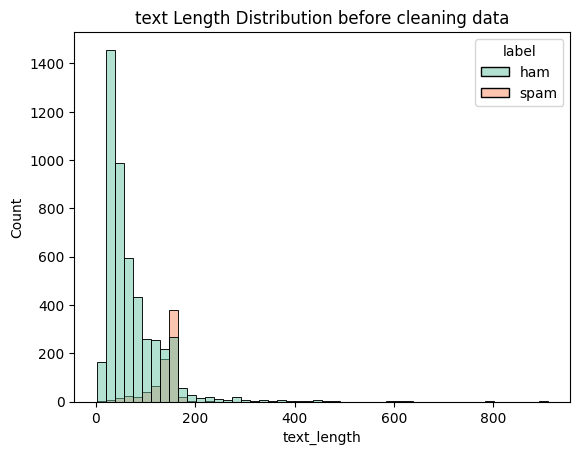


Average message length:
label
ham      45.050777
spam    104.888889
Name: text_length, dtype: float64


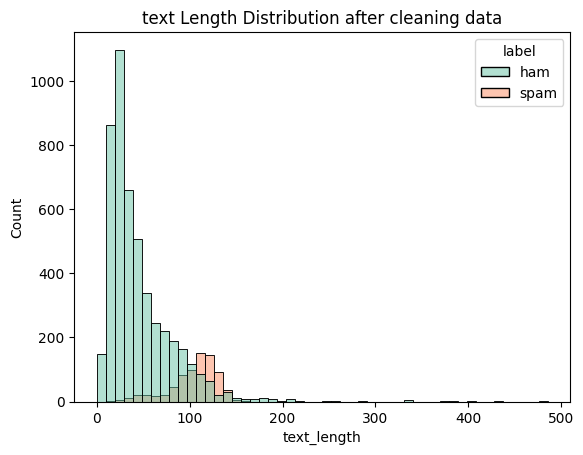

In [10]:
#before 2. Message Length Analysis
data_before["text_length"] = data_before["text"].apply(len)

print("\nAverage message length:")
print(data_before.groupby("label")["text_length"].mean())

sb.histplot(data=data_before, x="text_length", hue="label", bins=50, palette="Set2")
plt.title("text Length Distribution before cleaning data")
plt.show()

#after 2. Message Length Analysis
Dataset["text_length"] = Dataset["text"].apply(len)

print("\nAverage message length:")
print(Dataset.groupby("label")["text_length"].mean())

sb.histplot(data=Dataset, x="text_length", hue="label", bins=50, palette="Set2")
plt.title("text Length Distribution after cleaning data")
plt.show()

In [11]:
#Most Common Words in Spam and Ham
def most_common_words(messages, top_n=20):
    all_words = " ".join(messages).lower()
    all_words = all_words.translate(str.maketrans('', '', string.punctuation))
    words_list = all_words.split()
    return Counter(words_list).most_common(top_n)

print("before cleaning:")
print("\nTop 20 words in spam:")
print(most_common_words(data_before[data_before['label'] == 'spam']['text']))
print("Top 20 words in ham:")
print(most_common_words(data_before[data_before['label'] == 'ham']['text']))

#after 

print("\nData After cleaning:")
print("\nTop 20 words in spam:")
print(most_common_words(Dataset[Dataset['label'] == 'spam']['text']))
print("Top 20 words in ham:")
print(most_common_words(Dataset[Dataset['label'] == 'ham']['text']))


before cleaning:

Top 20 words in spam:
[('to', 686), ('a', 376), ('call', 347), ('you', 287), ('your', 263), ('free', 216), ('the', 204), ('for', 203), ('now', 189), ('or', 188), ('2', 173), ('is', 158), ('txt', 150), ('u', 147), ('on', 144), ('ur', 144), ('have', 135), ('from', 128), ('mobile', 123), ('and', 122)]
Top 20 words in ham:
[('i', 2185), ('you', 1837), ('to', 1554), ('the', 1118), ('a', 1052), ('u', 972), ('and', 848), ('in', 811), ('me', 756), ('my', 743), ('is', 728), ('it', 590), ('of', 524), ('for', 501), ('that', 486), ('im', 449), ('have', 438), ('but', 418), ('your', 414), ('so', 412)]

Data After cleaning:

Top 20 words in spam:
[('call', 366), ('free', 219), ('2', 176), ('txt', 169), ('u', 159), ('ur', 144), ('text', 139), ('mobil', 135), ('4', 123), ('stop', 116), ('claim', 115), ('repli', 112), ('you', 108), ('prize', 94), ('get', 88), ('to', 79), ('your', 78), ('tone', 74), ('new', 72), ('servic', 72)]
Top 20 words in ham:
[('i', 1921), ('u', 1004), ('go', 417)

In [12]:
#4. Special Character Frequency
def special_char_freq(texts, char):
    return sum(char in t for t in texts)
#before
print("\nSpecial Characters Usage after cleaning:")
for char in ['$', '!', '?']:
    print(f"{char}:")
    print("Spam:", special_char_freq(data_before[data_before['label'] == 'spam']['text'], char))
    print("Ham:", special_char_freq(data_before[data_before['label'] == 'ham']['text'], char))

print("\nMissing values in dataset:")
print(data_before.isnull().sum())

print("\nUnique labels:")
print(data_before['label'].unique())

#after
print("\nSpecial Characters Usage after cleaning:")
for char in ['$', '!', '?']:
    print(f"{char}:")
    print("Spam:", special_char_freq(Dataset[Dataset['label'] == 'spam']['text'], char))
    print("Ham:", special_char_freq(Dataset[Dataset['label'] == 'ham']['text'], char))

print("\nMissing values in dataset:")
print(Dataset.isnull().sum())

print("\nUnique labels:")
print(Dataset['label'].unique())


Special Characters Usage after cleaning:
$:
Spam: 4
Ham: 14
!:
Spam: 365
Ham: 559
?:
Spam: 133
Ham: 1084

Missing values in dataset:
label          0
text           0
text_length    0
dtype: int64

Unique labels:
['ham' 'spam']

Special Characters Usage after cleaning:
$:
Spam: 0
Ham: 0
!:
Spam: 0
Ham: 0
?:
Spam: 0
Ham: 0

Missing values in dataset:
label          0
text           0
text_length    0
dtype: int64

Unique labels:
['ham' 'spam']
